In [59]:
import pandas as pd
import numpy as np

df=pd.read_csv('/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/data/house_data_fs.csv', index_col = 0)
df = df.dropna()
df1 = df.head(50)
#df1 = df

### Linear regression model using a single feature

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

lr = LinearRegression()
model = lr.fit(X_scaled, y)

y_pred = model.predict(X_scaled)

# Evaluate
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Print results
print('R² score:', r2)
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)

R² score: 0.4173461244343012
Mean Squared Error (MSE): 62185849719.22219
Mean Absolute Error (MAE): 161171.37378587096


### Visualization for Linear Regression model

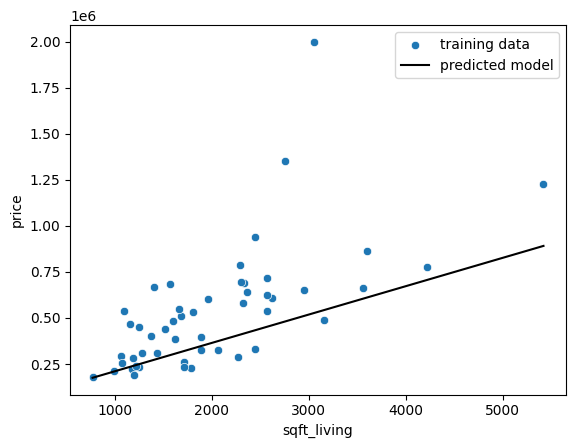

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
y_model = model.predict(scaler.fit_transform(x_model.reshape(-1,1)))
plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model'])
plt.show()

### Polynomial regression :
1) Feature scaling and Transform poly features 
2) model using a linear regression. 
3) Predict using the Model 

In [62]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

# Poly transformation 
order = 2
poly = PolynomialFeatures(degree=order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

# Modeling. 
lr = LinearRegression()
model = lr.fit(poly_features, y)
print(model.coef_, model.intercept_)

#Prediction

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

print('r2-score:', np.round(rscore), '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))


[240878.63506291 -21125.66947931] 553564.2694793064
r2-score: 0.0 
mean squared error: 60999286388.0 
mean absolute error: 157625.0


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression().fit(X_train_poly, y_train)
y_test_pred = model.predict(X_test_poly)

from sklearn.metrics import r2_score
print("Test R² score:", r2_score(y_test, y_test_pred))

Test R² score: 0.25128994176215513


### Visualization for Poly regression

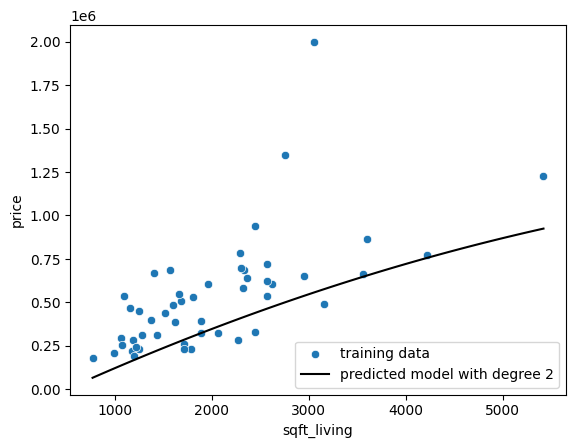

In [64]:
sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

x_model_poly  = poly.fit_transform(x_model_scaled)
y_model = model.predict(x_model_poly)

plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model with degree ' + str(order)])
plt.show()

### Saving Best Model for Deployment

In [65]:
import joblib
best_order = 2
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

poly = PolynomialFeatures(degree=best_order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))
    
lr = LinearRegression()
model = lr.fit(poly_features, y)

joblib.dump(model,'best_model.pkl')

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

print('r2-score:', np.round(rscore), '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))

r2-score: 0.0 
mean squared error: 60999286388.0 
mean absolute error: 157625.0
